In [2]:
import numpy as np 
from scipy.special import gammaincinv
from astropy.modeling import models 
from petrofit.models import sersic_enclosed, sersic_enclosed_inv
from petrofit.models import petrosian_profile, sersic_enclosed
from petrofit.petrosian import Petrosian, PetrosianCorrection
from petrofit.models import make_grid
from astropy.modeling import models, fitting

%matplotlib inline

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['image.origin'] = 'lower'
#plt.rcParams.update({'font.size': 17})


import matplotlib.pyplot as plt

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [5]:
def savefig(filename):
    plt.savefig("plots/"+filename, dpi=70, bbox_inches = 'tight', pad_inches = 0.2)

# Effective Radius and Intensity ($r_e$  and $I_{e}$)

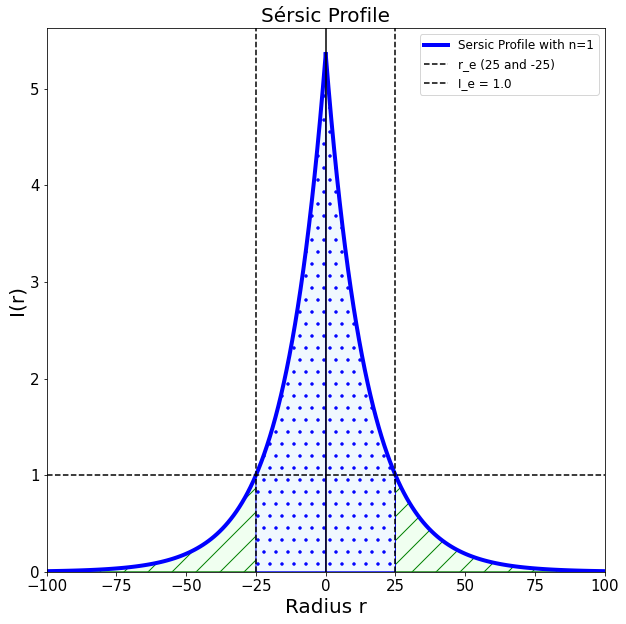

In [6]:
r_eff=25
n = 1 
model = models.Sersic1D(r_eff=r_eff, n=n)

r_list = np.arange(0, 101, 1)


plt.plot(r_list, model(r_list), c='b', linewidth=4, label="Sersic Profile with n={}".format(n))
plt.plot(-r_list, model(r_list), c='b', linewidth=4)

alpha = 1

plt.fill_between(r_list,model(r_list), color='honeydew', hatch='/', edgecolor='green', alpha=alpha)
plt.fill_between(-r_list,model(r_list), color='honeydew', hatch='/', edgecolor='green', alpha=alpha)

r_eff_list = np.arange(0, r_eff+1, 1)
plt.fill_between(r_eff_list,model(r_eff_list), color='aliceblue', hatch='.', edgecolor='blue', alpha=alpha)
plt.fill_between(-r_eff_list,model(r_eff_list), color='aliceblue', hatch='.', edgecolor='blue', alpha=alpha)


plt.axvline(r_eff, c='black', label='r_e ({} and -{})'.format(r_eff, r_eff), linestyle='--')
plt.axvline(-r_eff, c='black', linestyle='--')
plt.axvline(c='black')

plt.axhline(1, c='black', linestyle='--', label='I_e = {}'.format(model.amplitude.value))


plt.title("Sérsic Profile")
plt.xlabel("Radius r")
plt.ylabel("I(r)")
plt.legend()
plt.ylim(0, None)
plt.xlim(-100, 100)

savefig("sersic_radii.png")
plt.show()



# Curve of Growth

In [ ]:
r_list = np.arange(0, 201, 1)

amplitude, r_eff, n = [1, 25, 1]

flux_list = sersic_enclosed(r_list, amplitude, r_eff, n)
total_flux = sersic_enclosed(np.inf, amplitude, r_eff, n)

f, ax = plt.subplots(1,2, figsize=[20,10])
for i in range(2):
    plt.sca(ax[i])
    plt.plot(r_list, flux_list, c='Blue', linewidth=3, label='Curve of Growth')

    plt.axhline(total_flux, c='black', linestyle='-', linewidth=3, label='Total Flux')
    
    plt.axhline(total_flux/2, c='black', linestyle='--', linewidth=2,)
    plt.axvline(r_eff, c='black', linestyle='--', linewidth=2, label='Half Total Flux and Half Light Radius $r_e = {}$'.format(r_eff))

    eff = flux_list.copy()
    eff[r_eff:] = total_flux/2
    

    if i == 1:
        alpha = 0.75
        plt.fill_between(r_list, np.zeros_like(eff)+eff[-1], color='aliceblue', hatch='.', edgecolor='blue', alpha=alpha)
        plt.fill_between(r_list, np.zeros_like(eff)+flux_list[-1], np.zeros_like(eff)+eff[-1], color='honeydew', hatch='/', edgecolor='green', alpha=alpha)



    leg = plt.legend()
    for lh in leg.legendHandles: 
        lh._legmarker.set_alpha(1)
        lh.set_alpha(1)

    plt.title("Curve of Growth (COG)")
    plt.xlabel("Radius r")
    plt.ylabel("L($\leq$r)")
    legend = plt.legend()
    legend.get_frame().set_alpha(None)
    plt.ylim(0, None)
    plt.xlim(0, max(r_list))


savefig("sersic_cog.png")
plt.show()

In [ ]:
r_list = np.arange(0, 201, 1)

amplitude, r_eff, n = [1, 25, 1]

flux_list = sersic_enclosed(r_list, amplitude, r_eff, n)
total_flux = sersic_enclosed(np.inf, amplitude, r_eff, n)

i = 1
plt.plot(r_list, flux_list, c='blue', linewidth=3, label='Curve of Growth')

plt.axhline(total_flux, c='black', linestyle='-.', linewidth=3, label='Total Flux')

plt.axhline(total_flux/2, c='black', linestyle='--', linewidth=2,)
plt.axvline(r_eff, c='black', linestyle='--', linewidth=2, label='Half Total Flux and Half Light Radius $r_e = {}$'.format(r_eff))

eff = flux_list.copy()
eff[r_eff:] = total_flux/2

if i == 1:
    alpha = 0.5
    plt.fill_between(r_list, np.zeros_like(eff)+eff[-1], color='aliceblue', hatch='.', edgecolor='blue', alpha=alpha)
    plt.fill_between(r_list, np.zeros_like(eff)+flux_list[-1], np.zeros_like(eff)+eff[-1], color='honeydew', hatch='/', edgecolor='green', alpha=alpha)


leg = plt.legend()
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)
    lh.set_alpha(1)

plt.title("Sérsic Curve of Growth (COG)")
plt.xlabel("Radius r")
plt.ylabel("L($\leq$r)")
legend = plt.legend()
legend.get_frame().set_alpha(None)
plt.ylim(0, None)
plt.xlim(0, max(r_list))



savefig("sersic_single_cog.png")
plt.show()

# Sersic Index ($n$)

In [ ]:
r_eff=25
n = 1 


r_list = np.arange(0, 101, 1)


for line_style, c, n in zip(['-','-','-'], ['g', 'b', 'purple'],[0.5, 1, 4]):
    
    b_n = gammaincinv(2. * n, 0.5)
    model = models.Sersic1D(amplitude=1/np.exp(b_n),  r_eff=r_eff, n=n)
    
    plt.plot(r_list, model(r_list), c=c, linewidth=2, label="n = {}".format(n), linestyle=line_style)
    plt.plot(-r_list, model(r_list), c=c, linewidth=2, linestyle=line_style)


plt.title("Sérsic Indices")
plt.xlabel("Radius r")
plt.ylabel("I(r)")
plt.legend()
plt.ylim(0, None)
plt.xlim(-100, 100)

savefig("sersic_index.png")
plt.show()


# Petrosian Profiles 

In [ ]:
r_list = np.arange(0, 201, 1)

amplitude, r_eff, n = [1, 25, 1]

petro_list = petrosian_profile(r_list, r_eff, n)
petro_list[0] = 1

plt.plot(r_list, petro_list, color="b", linewidth=4, label='Petrosian Profile')


plt.title("Petrosian Profile")
plt.xlabel("Radius r")
plt.ylabel("Petrosian Value")
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, max(r_list))


plt.savefig("sersic_petrosian.png", dpi=70, bbox_inches = 'tight', pad_inches = 0)


plt.show()
flux_list = sersic_enclosed(r_list, amplitude, r_eff, n)
area_list = np.pi * r_list**2 

p = Petrosian(r_list[1:], area_list[1:], flux_list[1:],)

p.plot()

plt.title("Petrosian Profile")
plt.xlabel("Radius r")
plt.ylabel("Petrosian Value")
plt.legend()
plt.ylim(0, 1)
plt.xlim(0, max(r_list))

savefig("sersic_petrosian_eta.png")



# Petrosian Corrections 

('c0', 'c1', 'c2', 'c3', 'c4')
[ 308.21996821 -363.67346685  160.7305847   -31.46742937    2.3181023 ]
range_c2080 = (2.79, 4.98)


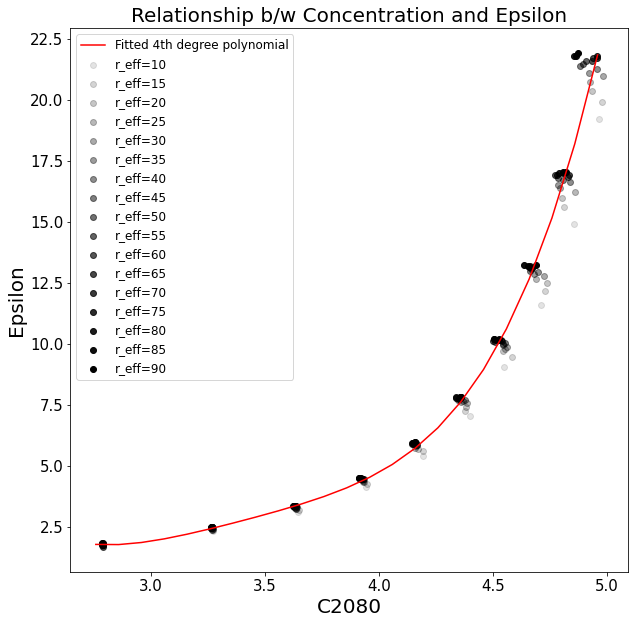

range_c2080 = (2.72, 4.89)


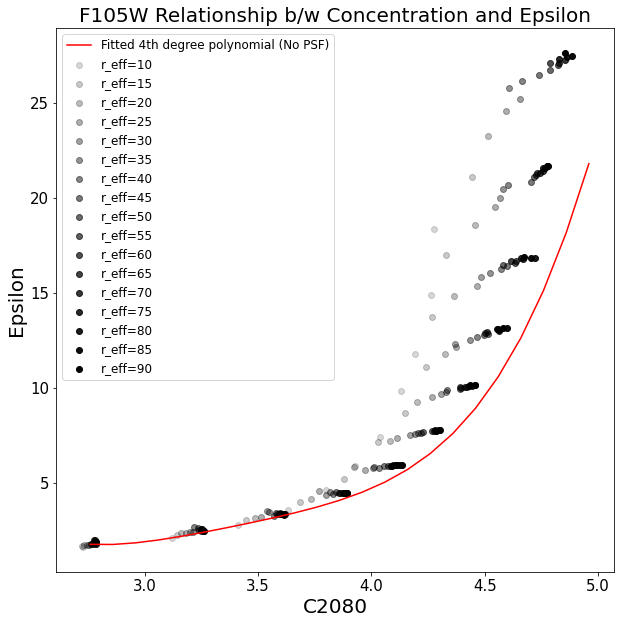

In [3]:
pc = PetrosianCorrection("concentration_index_grid_no_psf.yaml")

keyx = 'c_index'
keyy = 'epsilon'

x = []
y = []

for i, key in enumerate(list(pc.grid.keys())[:]):
    if key < 10 or key > 90:
        continue
    a = (i+2) / len(pc.grid)
    data = pc.grid[key]
    plt.scatter(data[keyx], np.array(data[keyy]), c='black', alpha=a, label='r_eff={}'.format(key))

    x += data[keyx]
    y += data[keyy]

x = np.array(x)
y = np.array(y)

#plt.plot(data[keyx], 10.0**(-1.7) * np.array(data[keyx])**3.5)

# initialize a linear fitter
fit = fitting.LinearLSQFitter()
#fit = fitting.LevMarLSQFitter()
# initialize a linear model
line_init = models.Polynomial1D(4)
#line_init = models.Exponential1D() + models.Const1D()
fitted_line = fit(line_init, x, y)

print(fitted_line.param_names)
print(fitted_line.parameters)

arr = np.arange(x.min()*0.99, x.max()*1.01, 0.1)
#line_init = models.Exponential1D() + models.Const1D()
plt.plot(arr, fitted_line(arr), c='red', label='Fitted 4th degree polynomial')
#plt.plot(arr, 0.1102*np.exp(arr/1.25))

plt.title("Relationship b/w Concentration and Epsilon")
plt.xlabel("C2080")
plt.ylabel("Epsilon")
plt.legend()

savefig("concentration_index_vs_epsilon.png")

print("range_c2080 = ({:.2f}, {:.2f})".format(x.min(), x.max()))

plt.show()

#########################################################

pc = PetrosianCorrection("concentration_index_grid_f105w_60mas.yaml")

x = []
y = []

for i, key in enumerate(list(pc.grid.keys())[:]):
    if key < 10 or key > 90:
        continue
    a = (i+2) / len(pc.grid)
    data = pc.grid[key]
    plt.scatter(data[keyx], np.array(data[keyy]), c='black', alpha=a, label='r_eff={}'.format(key))

    x += data[keyx]
    y += data[keyy]

x = np.array(x)
y = np.array(y)

plt.plot(arr, fitted_line(arr), c='red', label='Fitted 4th degree polynomial (No PSF)')

plt.title("F105W Relationship b/w Concentration and Epsilon")
plt.xlabel("C2080")
plt.ylabel("Epsilon")
plt.legend()

savefig("f105w_concentration_index_vs_epsilon.png")

print("range_c2080 = ({:.2f}, {:.2f})".format(x.min(), x.max()))

plt.show()
    

In [27]:
min(x)

0.5

In [ ]:
import numpy as np 
from petrofit.petrosian import PetrosianCorrection
from astropy.modeling import models, fitting

%matplotlib inline

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['image.origin'] = 'lower'

pc = PetrosianCorrection("concentration_index_grid_no_psf.yaml")

keyx = 'c_index'
keyy = 'n'

x = []
y = []

for i, key in enumerate(list(pc.grid.keys())[:]):
    if key < 10 or key > 90:
        continue
    a = (i+2) / len(pc.grid)
    data = pc.grid[key]
    plt.scatter(data[keyx], np.array(data[keyy]), c='black', alpha=a, label='r_eff={}'.format(key))

    x += data[keyx]
    y += data[keyy]

x = np.array(x)
y = np.array(y)

#plt.plot(data[keyx], 10.0**(-1.7) * np.array(data[keyx])**3.5)

# initialize a linear fitter
fit = fitting.LevMarLSQFitter()
# initialize a linear model
line_init = models.Exponential1D() + models.Const1D()
fitted_line = fit(line_init, x, y)

print(fitted_line.param_names)
print(fitted_line.parameters)

arr = np.arange(x.min()*0.99, x.max()*1.01, 0.1)
#line_init = models.Exponential1D() + models.Const1D()
plt.plot(arr, fitted_line(arr), c='red', label='Fitted Exponential'.format(*fitted_line.parameters))
#plt.plot(arr, 0.1102*np.exp(arr/1.25))

plt.title("Relationship b/w Concentration Index and Sersic Index")
plt.xlabel("C2080")
plt.ylabel("Sersic Index n")
plt.legend()

savefig("concentration_index_vs_n.png")

print("range_c2080 = ({:.2f}, {:.2f})".format(x.min(), x.max()))

plt.show()

('amplitude_0', 'tau_0', 'amplitude_1')
[ 1.6165519   2.09383703 -0.85135821]
range_c2080 = (1.00, 5.50)


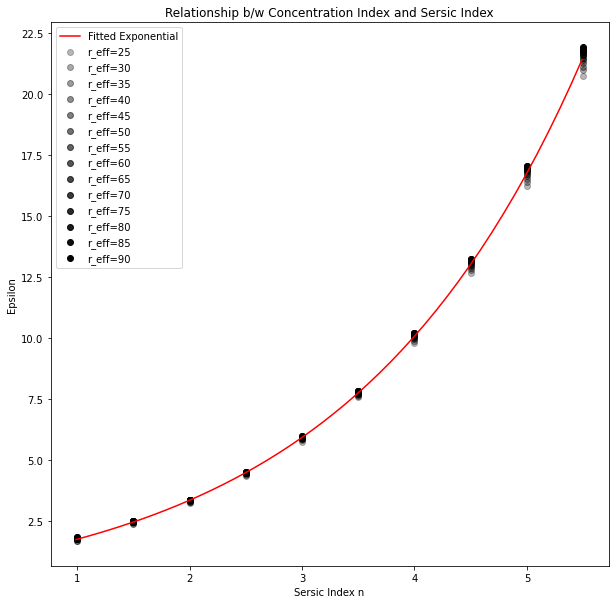

In [1]:
import numpy as np 
from petrofit.petrosian import PetrosianCorrection
from astropy.modeling import models, fitting

%matplotlib inline

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['image.origin'] = 'lower'

pc = PetrosianCorrection("concentration_index_grid_no_psf.yaml")

keyx = 'n'
keyy = 'epsilon'

x = []
y = []

for i, key in enumerate(list(pc.grid.keys())[:]):
    if key < 25 or key > 90:
        continue
    a = (i+2) / len(pc.grid)
    data = pc.grid[key]
    plt.scatter(data[keyx], np.array(data[keyy]), c='black', alpha=a, label='r_eff={}'.format(key))

    x += data[keyx]
    y += data[keyy]

x = np.array(x)
y = np.array(y)

#plt.plot(data[keyx], 10.0**(-1.7) * np.array(data[keyx])**3.5)

# initialize a linear fitter
fit = fitting.LevMarLSQFitter()
# initialize a linear model
line_init = models.Exponential1D() + models.Const1D()
fitted_line = fit(line_init, x, y)

print(fitted_line.param_names)
print(fitted_line.parameters)

arr = np.arange(x.min()*0.99, x.max()*1.01, 0.1)
#line_init = models.Exponential1D() + models.Const1D()
plt.plot(arr, fitted_line(arr), c='red', label='Fitted Exponential'.format(*fitted_line.parameters))
#plt.plot(arr, 0.1102*np.exp(arr/1.25))

plt.title("Relationship b/w Concentration Index and Sersic Index")
plt.xlabel("Sersic Index n")
plt.ylabel("Epsilon")

plt.legend()

#savefig("n_vs_epsilon.png")

print("range_c2080 = ({:.2f}, {:.2f})".format(x.min(), x.max()))

plt.show()

# multi_fit

In [ ]:
# Saved for doc notebook, no code to run see multi_object.ipynb
#plt.savefig("./images/multi_fit.png", dpi=100, bbox_inches = 'tight', pad_inches = 0)


# Oversample grids 

In [ ]:
size = 4
x, y = make_grid(size, 1)
plt.scatter(x, y, label="One to one sampling", s=200)

x, y = make_grid(size, 8)
plt.scatter(x, y, label="Oversampling by a factor of 2", s=75, marker='s')

x, y = make_grid(size, 4)
plt.scatter(x, y, label="Oversampling by a factor of 4", s=30, marker='x')



plt.title("Sampling Grids")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")


ax = plt.gca()

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, size, 1)
minor_ticks = np.arange(0, size, 0.5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid(which='minor', linewidth=2)
ax.grid(which='major', linewidth=1, linestyle='--')

plt.legend(loc='lower right')

plt.xlim(-0.5, size-.5)
plt.ylim(-0.5, size-.5)
savefig("sampling_grids.png")



plt.show()

In [ ]:
f = lambda n: (0.5/n) - (0.5)
f = lambda n: (1/(2*n)) - (1/2)
f = lambda n: (1-n)/(2*n)

for n in range(1, 8):
    x, y = make_grid(size, n)

    print(x[0][0],f(n))

In [ ]:
fx= lambda i : f(n) + (i*(1/n))

In [ ]:
np.round(x[0] - fx(np.arange(0, size*n)), 6)

In [ ]:
fx(np.arange(0, n)) + 1

In [ ]:
x[0]

In [ ]:
n